<a href="https://colab.research.google.com/github/mehdi-tahan/Pathrise-Project/blob/main/Pathrise_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size='+3' color='Blue' face='Palatino
'><b>Understanding the Objectives</b></font>

<font size='+1.5' color='PINK' face='Palatino
'><b>The goal is to predict the salary of data related positions based on location, company review and job title</b></font>

<font size='+2' color='GREEN' face='Palatino
'><b>Importing Libraries</b></font>

---



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics
import pickle

In [ ]:
df = pd.read_excel('/content/sample_data/Data_Pathrise.xlsx')

In [ ]:
df = df.drop(columns=['id'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   pathrise_status              2544 non-null   object 
 1   primary_track                2544 non-null   object 
 2   cohort_tag                   2536 non-null   object 
 3   program_duration_days        1928 non-null   float64
 4   placed                       2544 non-null   int64  
 5   employment_status            2315 non-null   object 
 6   highest_level_of_education   2486 non-null   object 
 7   length_of_job_search         2470 non-null   object 
 8   biggest_challenge_in_search  2520 non-null   object 
 9   professional_experience      2322 non-null   object 
 10  work_authorization_status    2260 non-null   object 
 11  number_of_interviews         2326 non-null   float64
 12  number_of_applications       2544 non-null   int64  
 13  gender            

In [ ]:
df.shape

(2544, 15)

In [ ]:
df.columns

Index(['pathrise_status', 'primary_track', 'cohort_tag',
       'program_duration_days', 'placed', 'employment_status ',
       'highest_level_of_education', 'length_of_job_search',
       'biggest_challenge_in_search', 'professional_experience',
       'work_authorization_status', 'number_of_interviews',
       'number_of_applications', 'gender', 'race'],
      dtype='object')

<font size='+2' color='GREEN' face='Palatino
'><b>Handling Missing Values</b></font>

---



<Axes: >

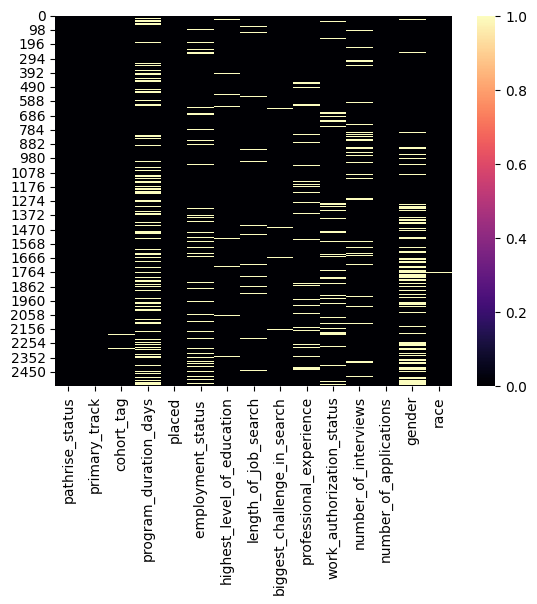

In [ ]:
sns.heatmap(df.isnull(),cmap = 'magma',cbar = True)

In [ ]:
df.isna().sum().sort_values(ascending=False).to_frame().style.set_properties(**{"background-color": "red","color":"black","border": "1.5px solid black"})

,0
program_duration_days,616
gender,492
work_authorization_status,284
employment_status,229
professional_experience,222
number_of_interviews,218
length_of_job_search,74
highest_level_of_education,58
biggest_challenge_in_search,24
race,18


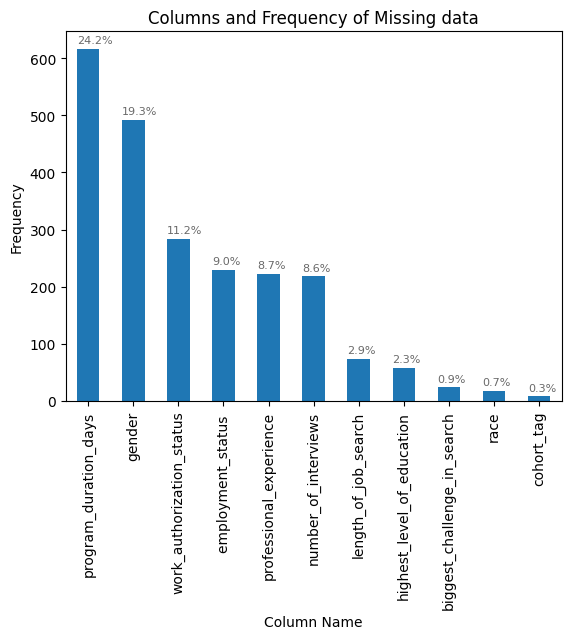

In [ ]:
missing = df.isnull().sum()
missing = missing[missing>0]
missing.sort_values(inplace=True, ascending=False)
ax = missing.plot(kind='bar')
ax.set_alpha(0.8)
ax.set_title("Columns and Frequency of Missing data")
ax.set_ylabel("Frequency")
ax.set_xlabel('Column Name')


for i in ax.patches:

     ax.text(i.get_x(), i.get_height() + 10, \
            str(round((i.get_height()/len(df))*100, 1))+'%', fontsize=8,
                color='dimgrey')

In [ ]:
df = df.copy()

In [ ]:
df = df.dropna(subset=['program_duration_days'])

In [ ]:
def fill_with_mode(df, columns_to_fill):
    df = df.copy()
    for col in columns_to_fill:
        df[col] = df[col].fillna(df[col].mode()[0])
    return df

In [ ]:
columns_to_fill = ['cohort_tag','employment_status ','highest_level_of_education','length_of_job_search','biggest_challenge_in_search', 'professional_experience', 'work_authorization_status','gender', 'race']

In [ ]:
df = fill_with_mode(df, columns_to_fill)

In [ ]:
# Run a normality test to determine if I should impute using the mean or median
def normal_test(df):

  _,p = stats.normaltest(df, nan_policy = 'omit')

  if p < 0.05:
        return False
  else:
        return True

In [ ]:
normal_test(df['number_of_interviews'])

False

In [ ]:
median_value = df['number_of_interviews'].median()

In [ ]:
df['number_of_interviews'].fillna(median_value, inplace=True)

In [ ]:
print(df.isnull().sum())

pathrise_status                0
primary_track                  0
cohort_tag                     0
program_duration_days          0
placed                         0
employment_status              0
highest_level_of_education     0
length_of_job_search           0
biggest_challenge_in_search    0
professional_experience        0
work_authorization_status      0
number_of_interviews           0
number_of_applications         0
gender                         0
race                           0
dtype: int64


In [ ]:
# Access the 'cohort_tag' column to remove extra characters

df['cohort_tag'] = df['cohort_tag'].apply(lambda x: x[:-1] if x.endswith('B') else x)
df['cohort_tag'] = df['cohort_tag'].apply(lambda x: x[:-1] if x.endswith('A') else x)

In [ ]:
df.describe(include='object').T.style.set_properties(**{"background-color": "blue","color":"black","border": "1.5px solid black"})

,count,unique,top,freq
pathrise_status,1928,6,Placed,956
primary_track,1928,6,SWE,1306
cohort_tag,1928,31,JAN19,178
employment_status,1928,5,Student,761
highest_level_of_education,1928,7,Bachelor's Degree,1078
length_of_job_search,1928,5,Less than one month,687
biggest_challenge_in_search,1928,10,Hearing back on my applications,757
professional_experience,1928,4,1-2 years,801
work_authorization_status,1928,9,Citizen,1052
gender,1928,4,Male,1505


<font size='+2' color='GREEN' face='Palatino
'><b>Outliers Detection</b></font>

---



<Axes: xlabel='placed', ylabel='program_duration_days'>

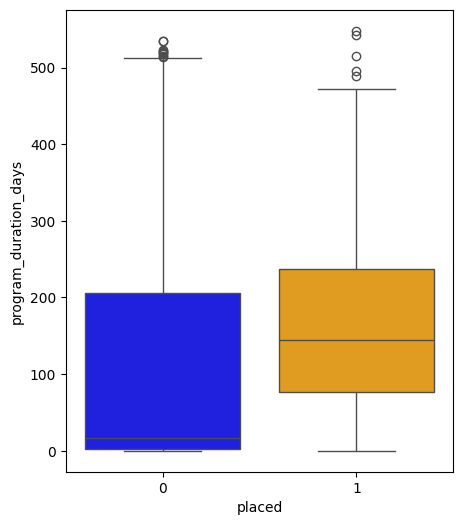

In [ ]:
plt.figure(figsize=(5, 6))
colors = ['blue', 'orange', 'green', 'red', 'purple']
sns.boxplot(x='placed', y='program_duration_days', data=df, palette=colors)

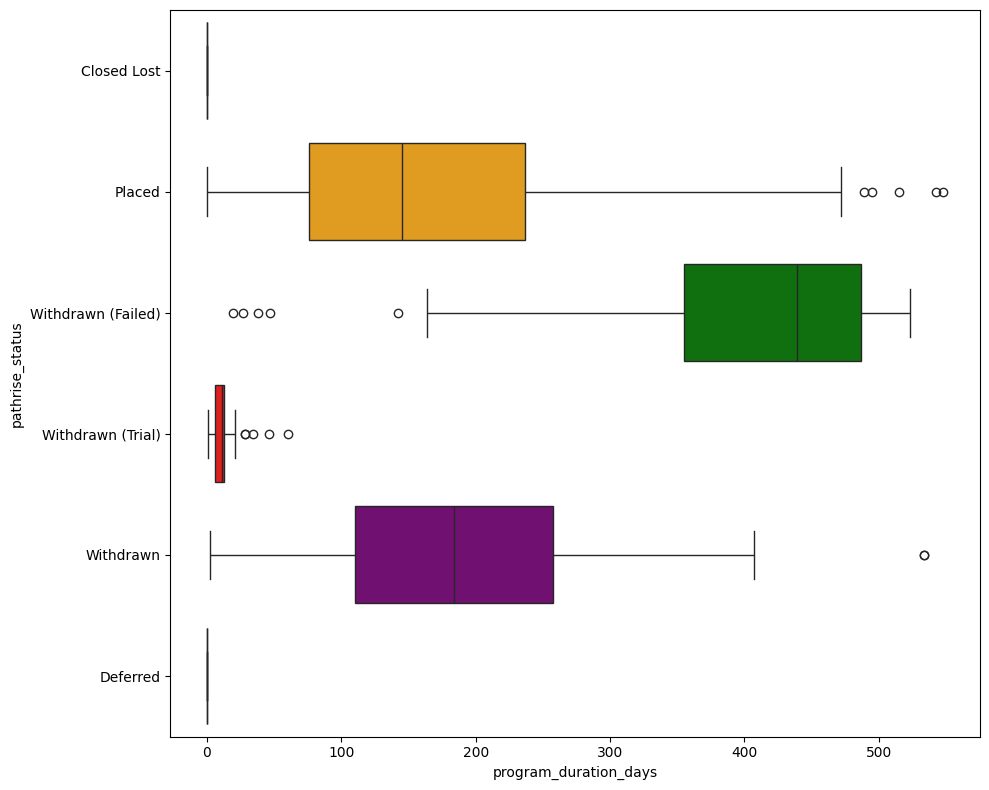

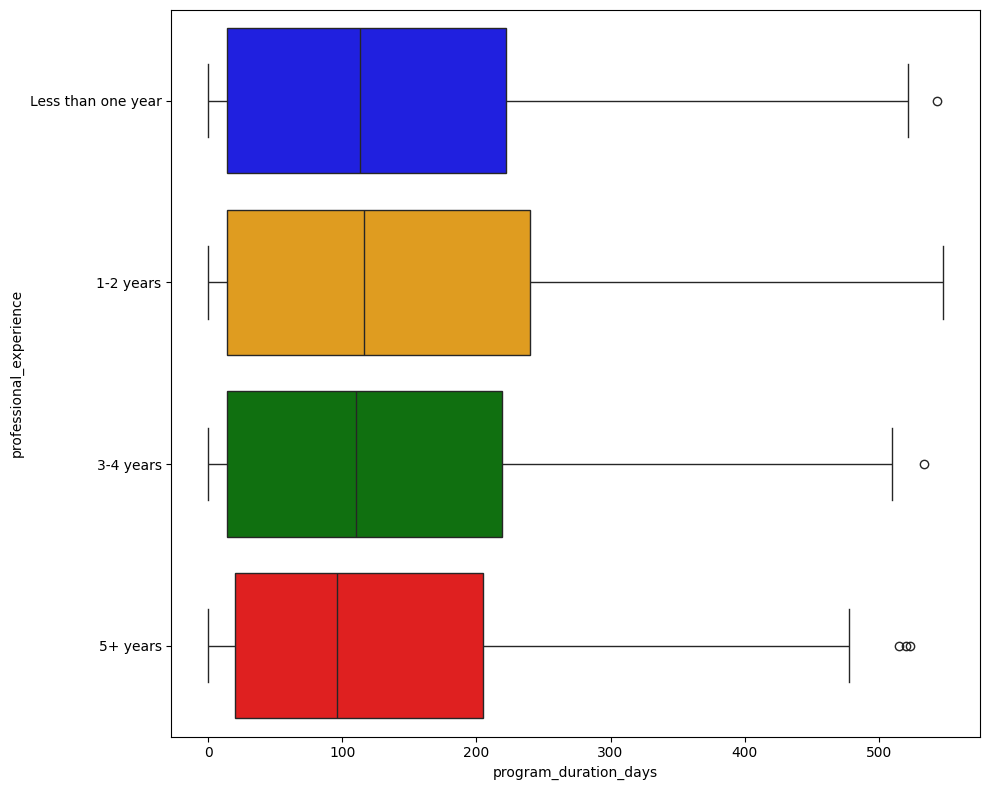

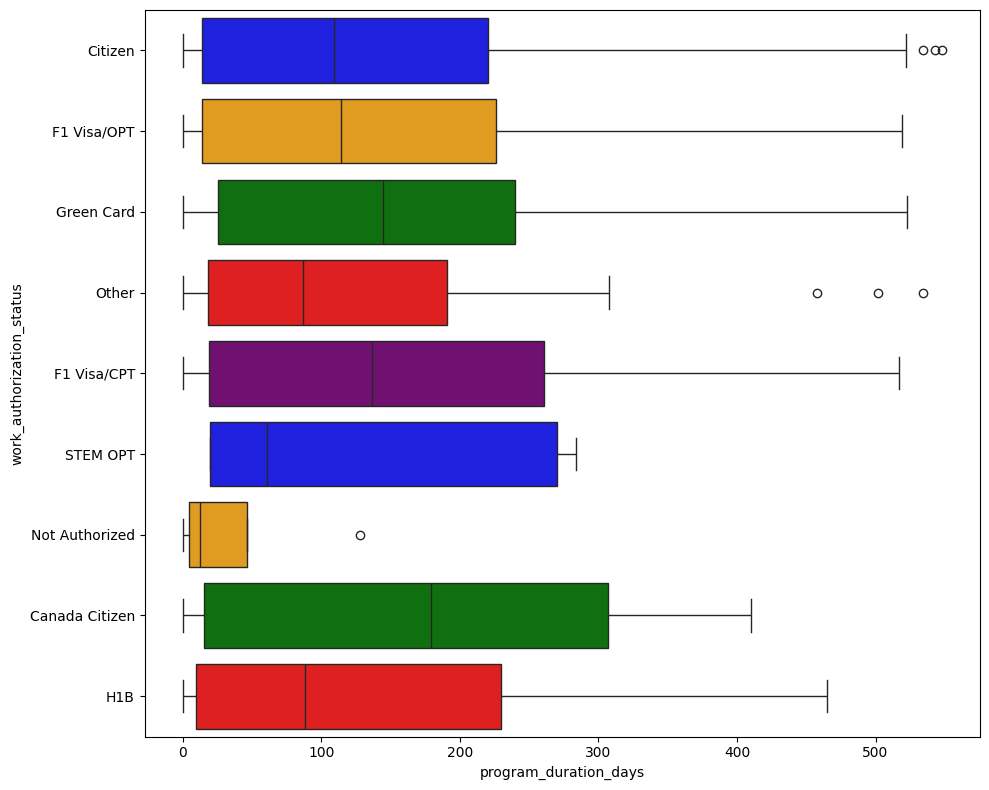

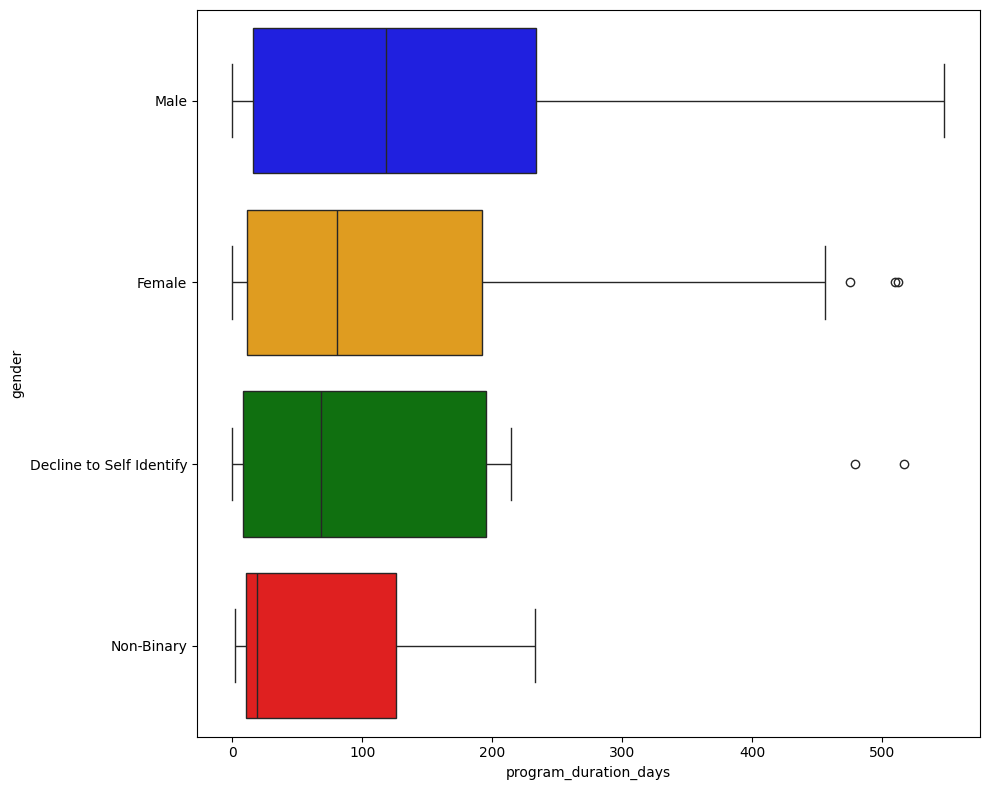

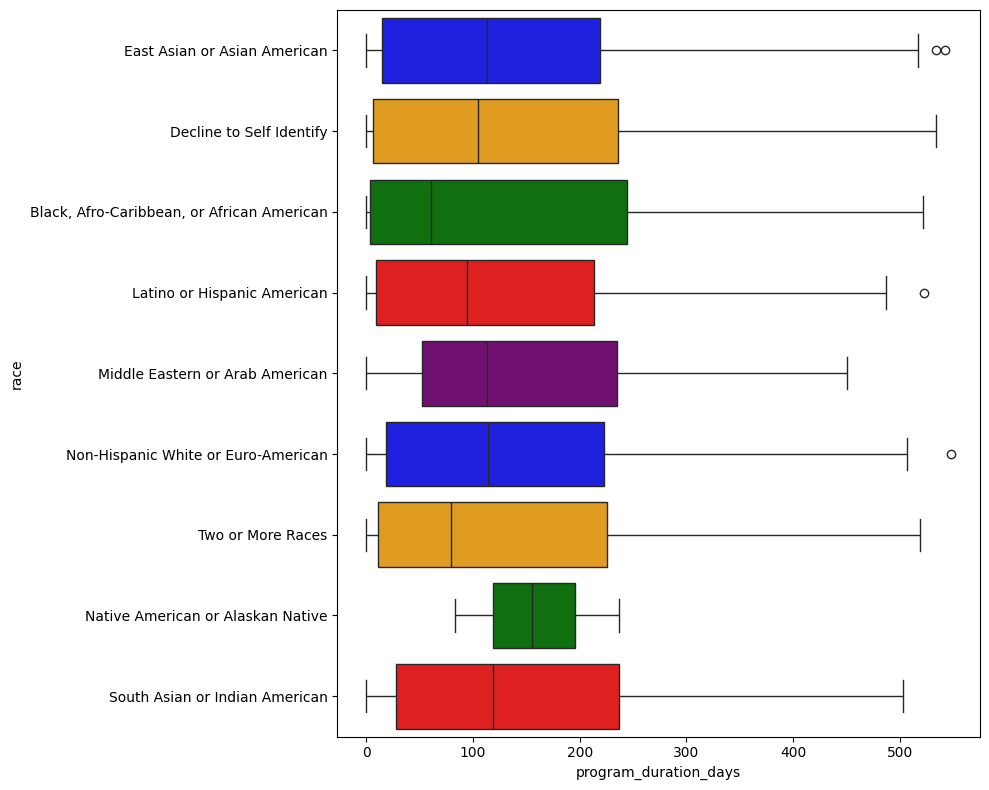

In [ ]:
columns_with_boxplot = df[['pathrise_status', 'professional_experience',
       'work_authorization_status','gender', 'race']]

for column in columns_with_boxplot.columns:
    plt.figure(figsize=(10, 8))
    sns.boxplot(x='program_duration_days', y=column, data=df, palette=colors)
    plt.tight_layout()
    plt.show()


<font size='+2' color='GREEN' face='Palatino
'><b>Exploratory Data Analysis (EDA)</b></font>

---





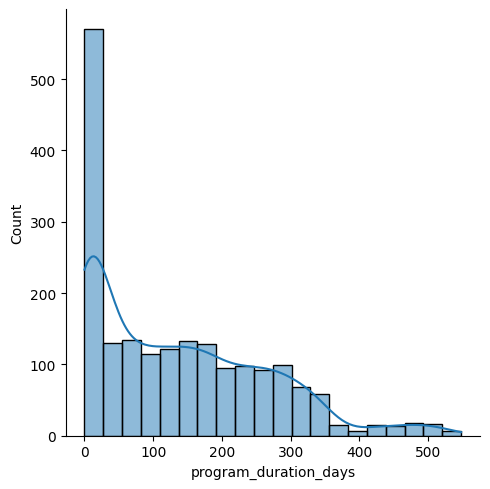

In [ ]:
sns.displot(df, x='program_duration_days', kde=True, bins=20)

In [ ]:
custom_colors = ["red", "green", "blue", "orange", "purple"]


In [ ]:
l = list(df['placed'].value_counts())
circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]

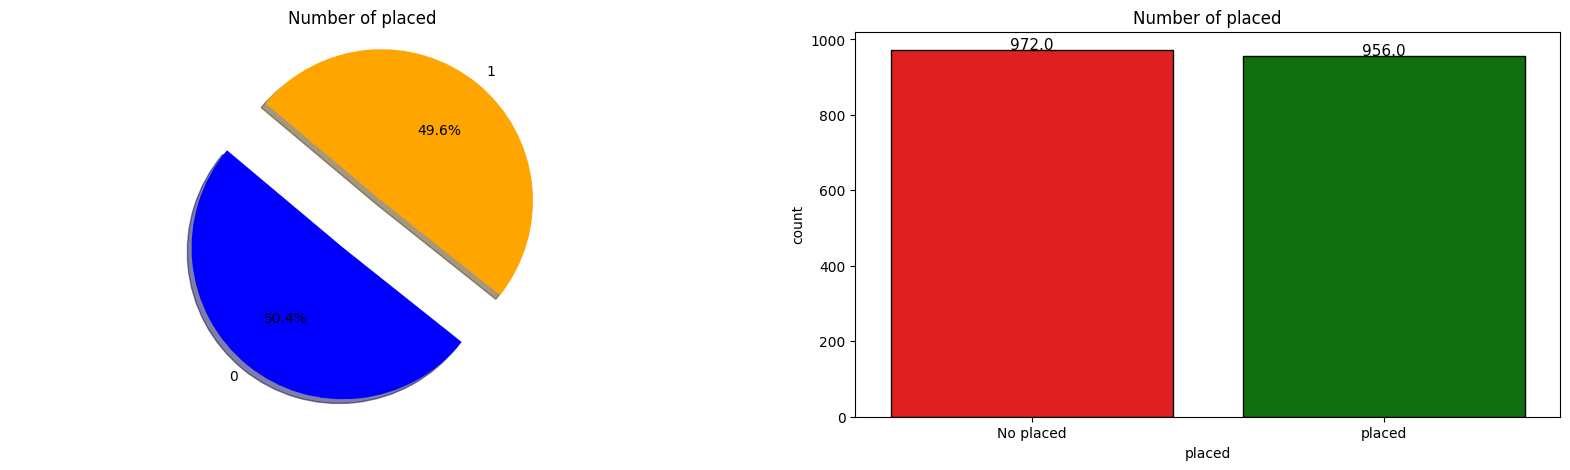

In [ ]:
fig, axis = plt.subplots(1,2, figsize=(20,5))
plt.subplot(1,2,1)
category_counts = df['placed'].value_counts()

sizes = (category_counts / category_counts.sum()) * 100

labels = category_counts.index

colors = ['blue', 'orange', 'green', 'red', 'purple']
explode = [0.2] * len(labels)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Number of placed')
plt.axis('equal')

plt.subplot(1,2,2)
ax = sns.countplot(x='placed',data = df, palette = custom_colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['No placed','placed'])
plt.title('Number of placed')
plt.show()

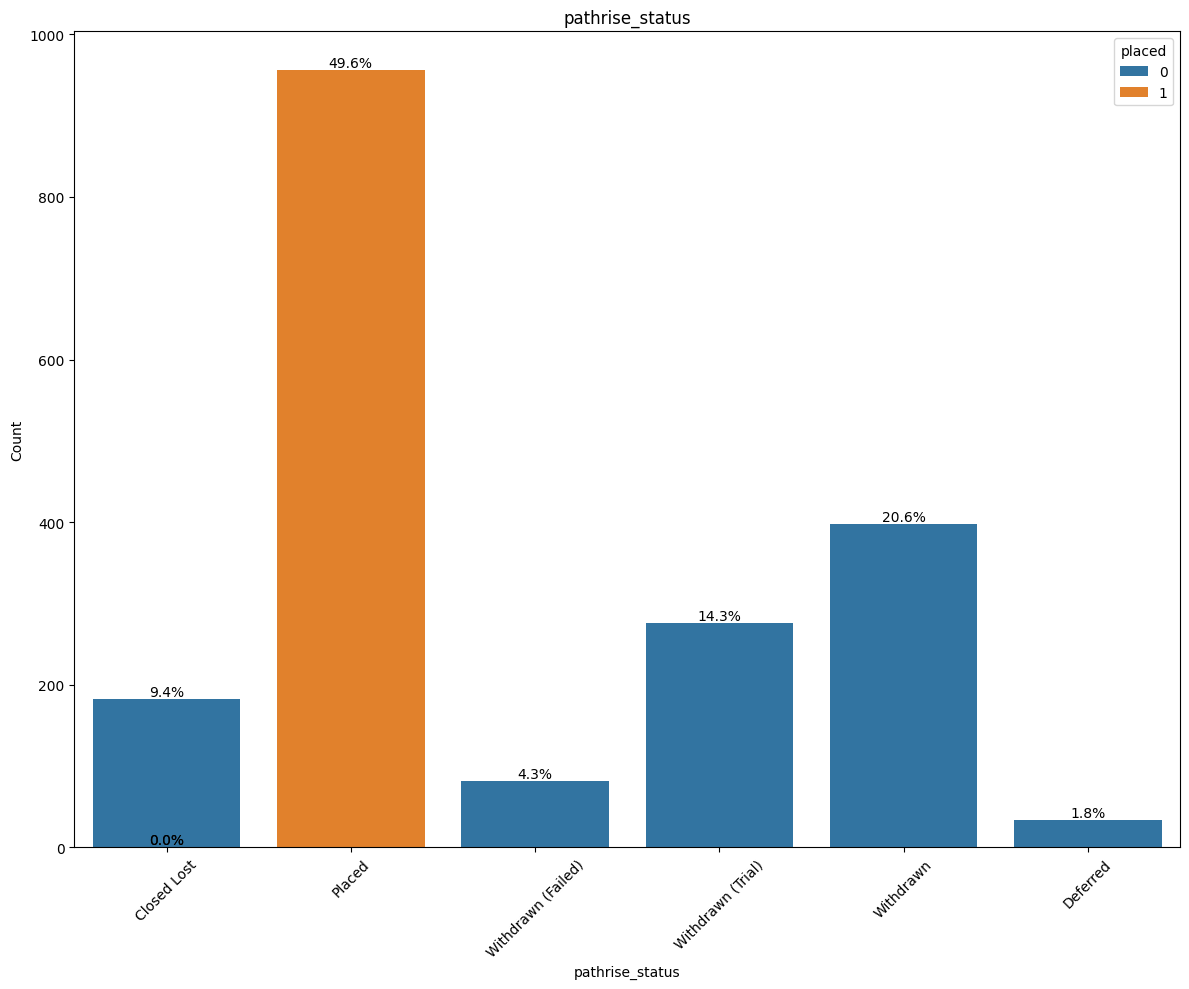

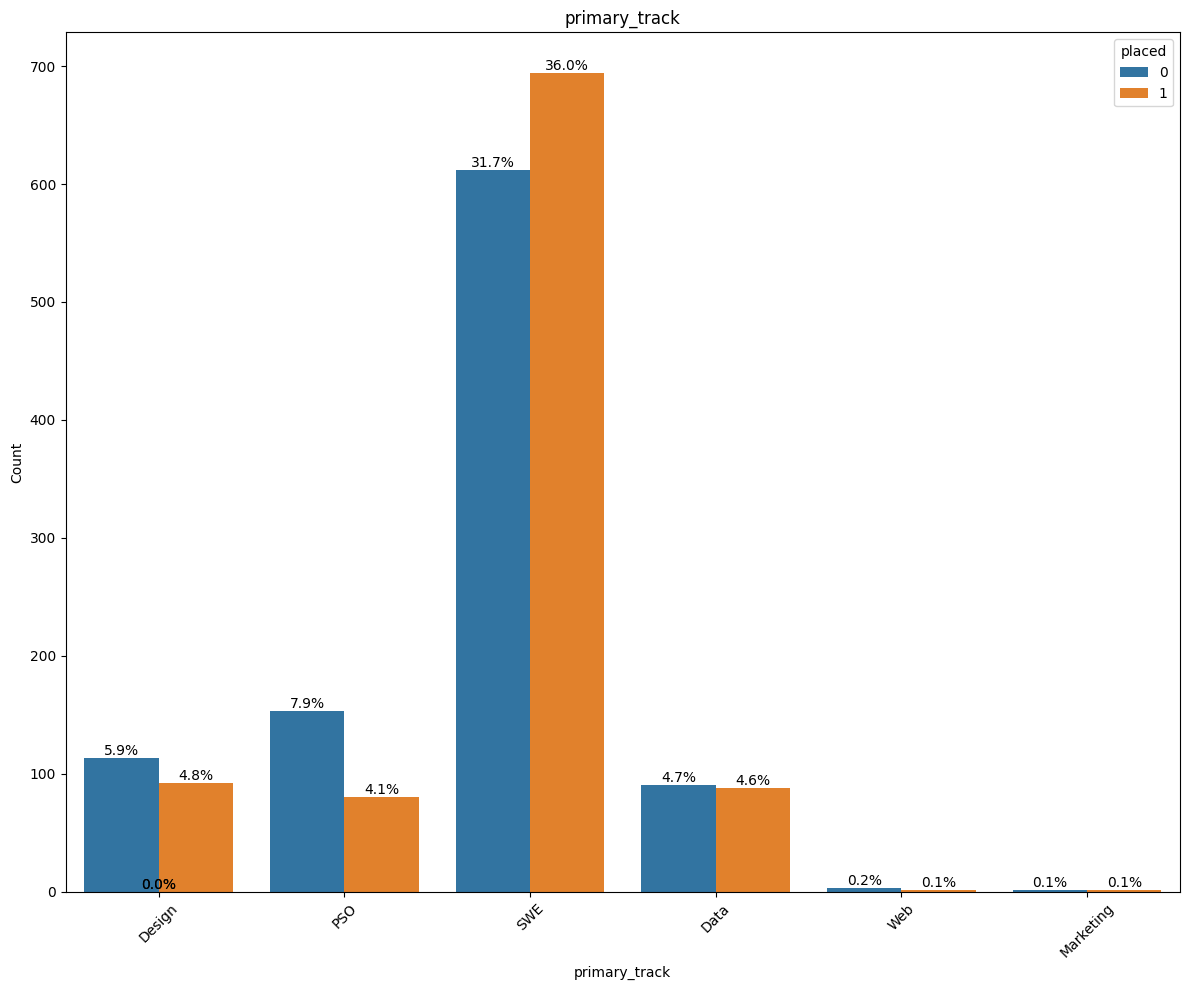

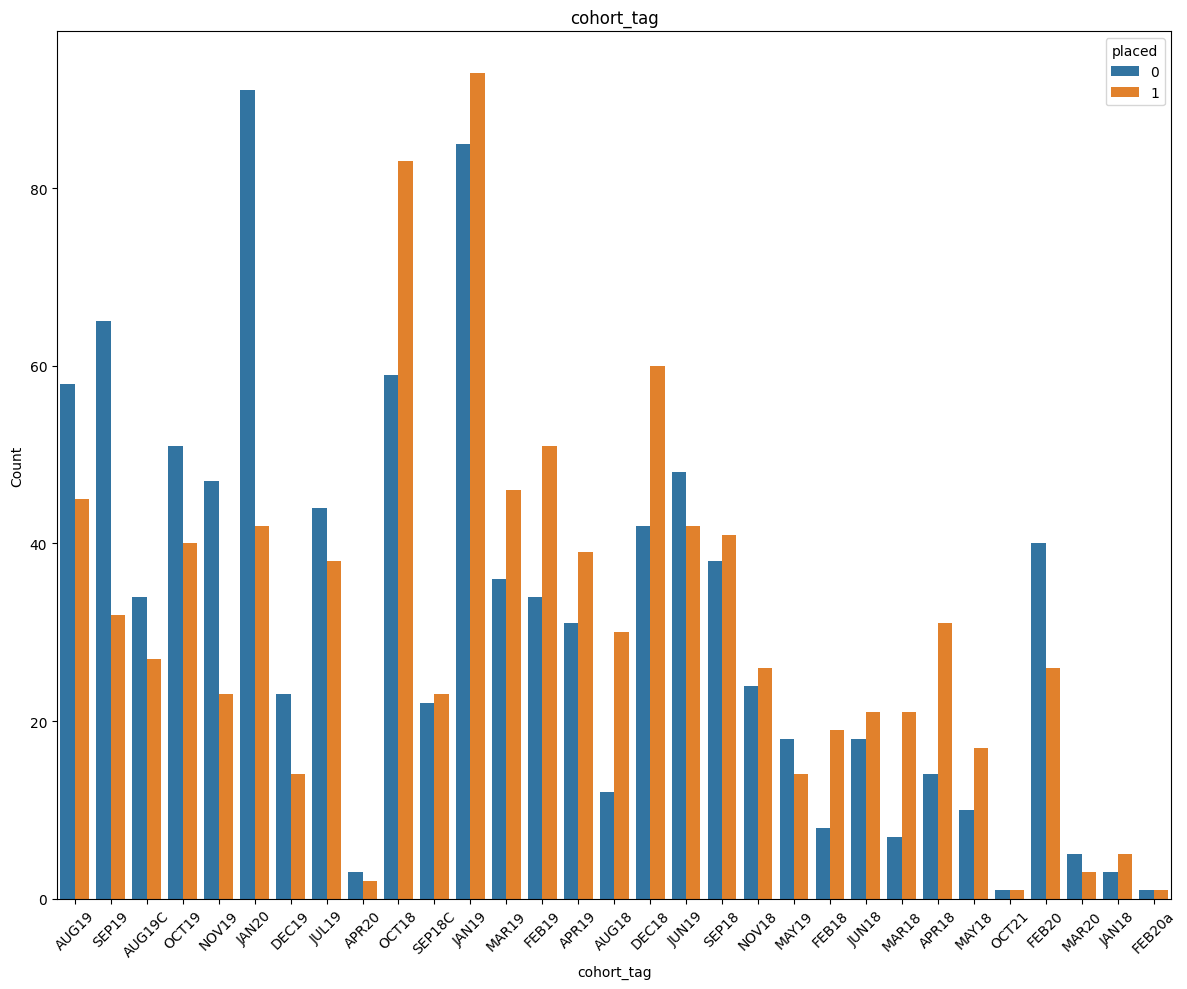

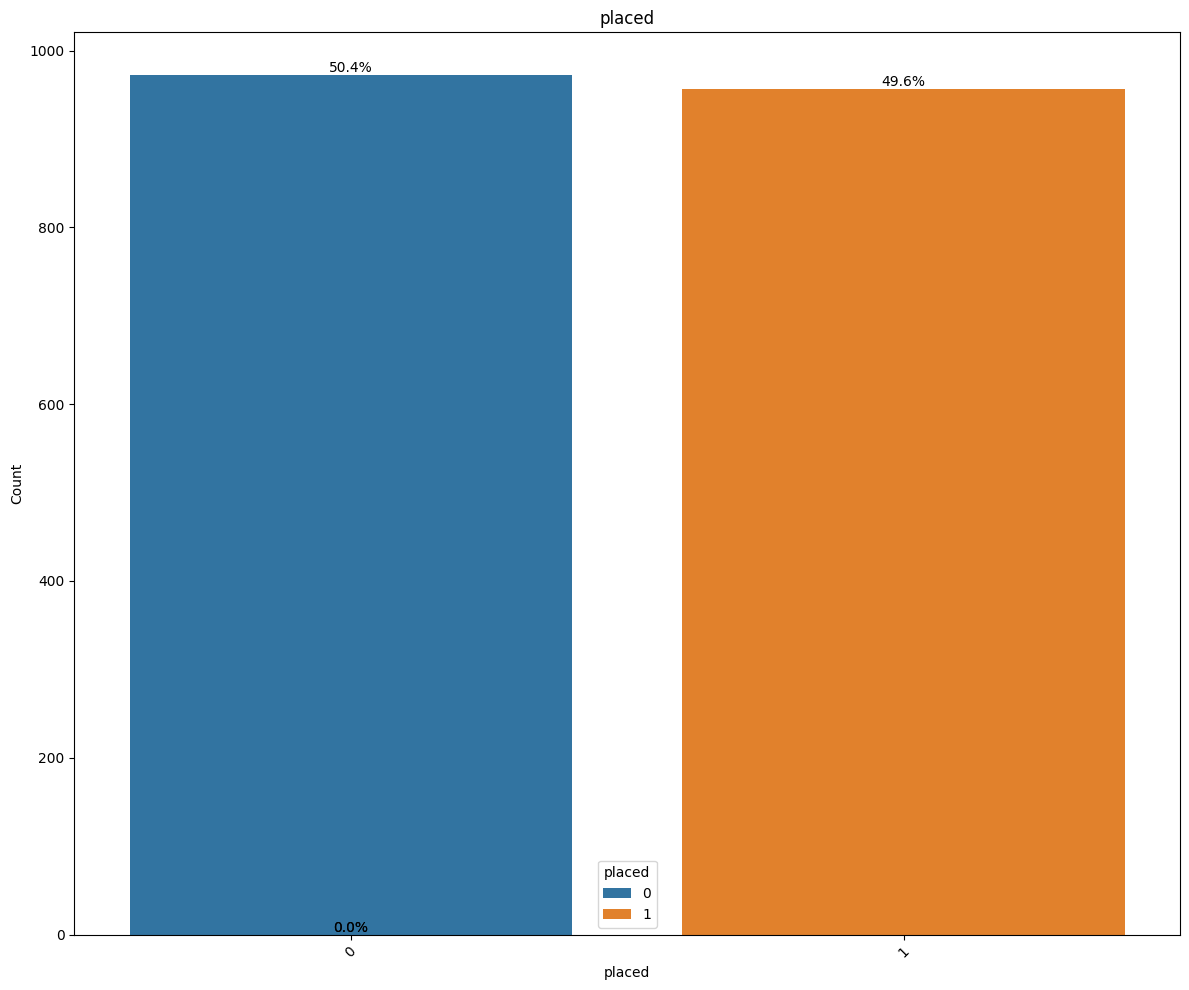

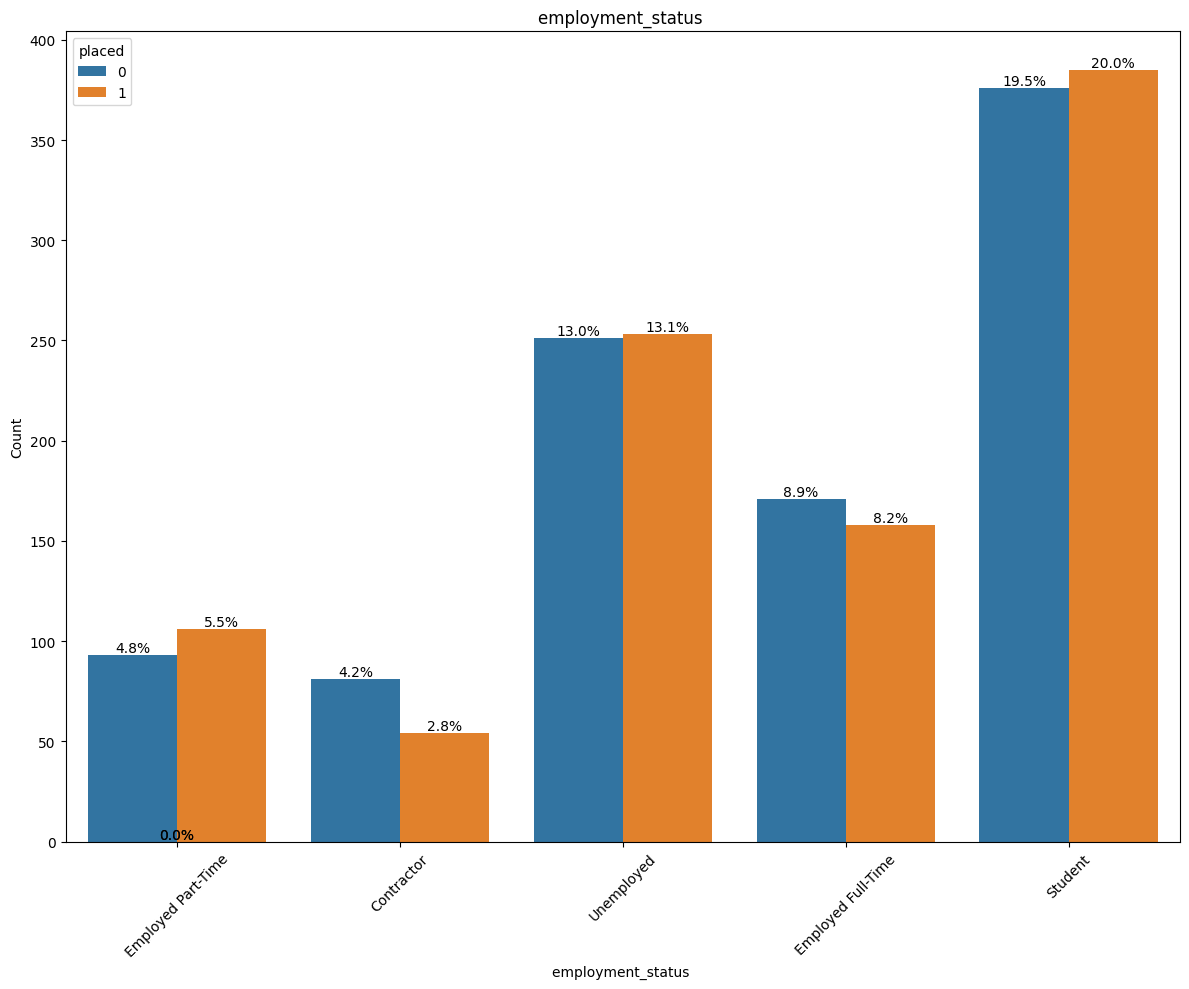

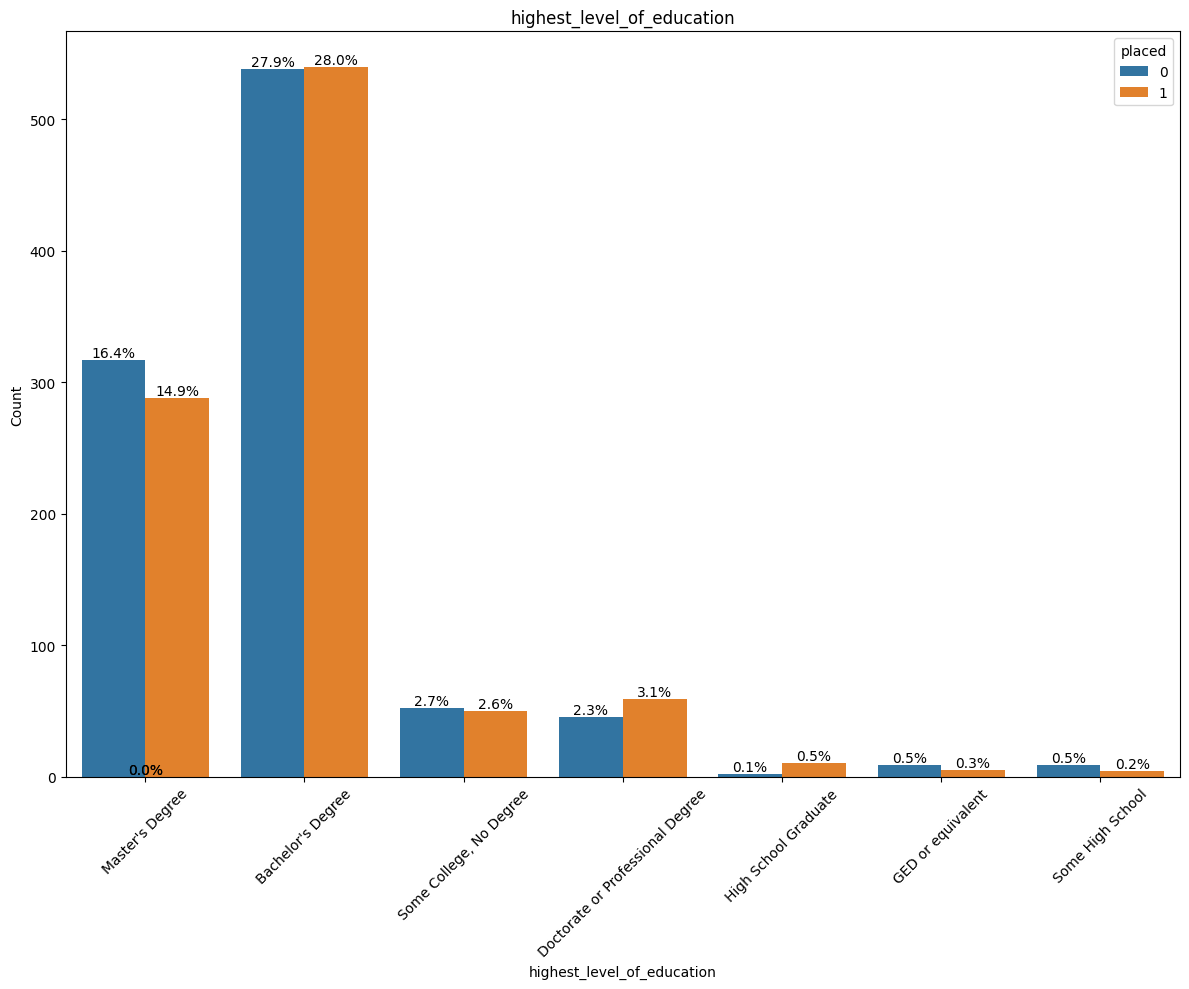

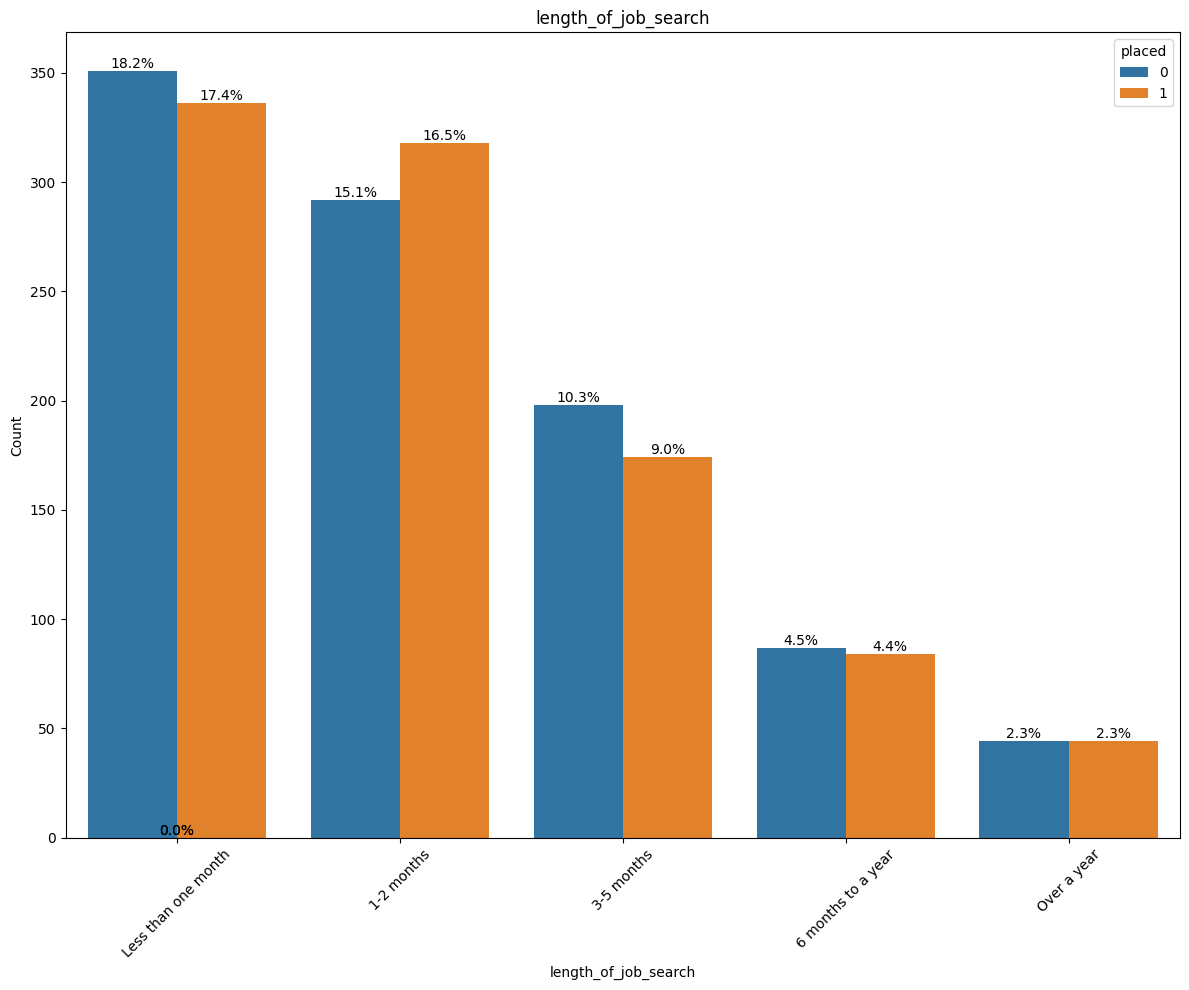

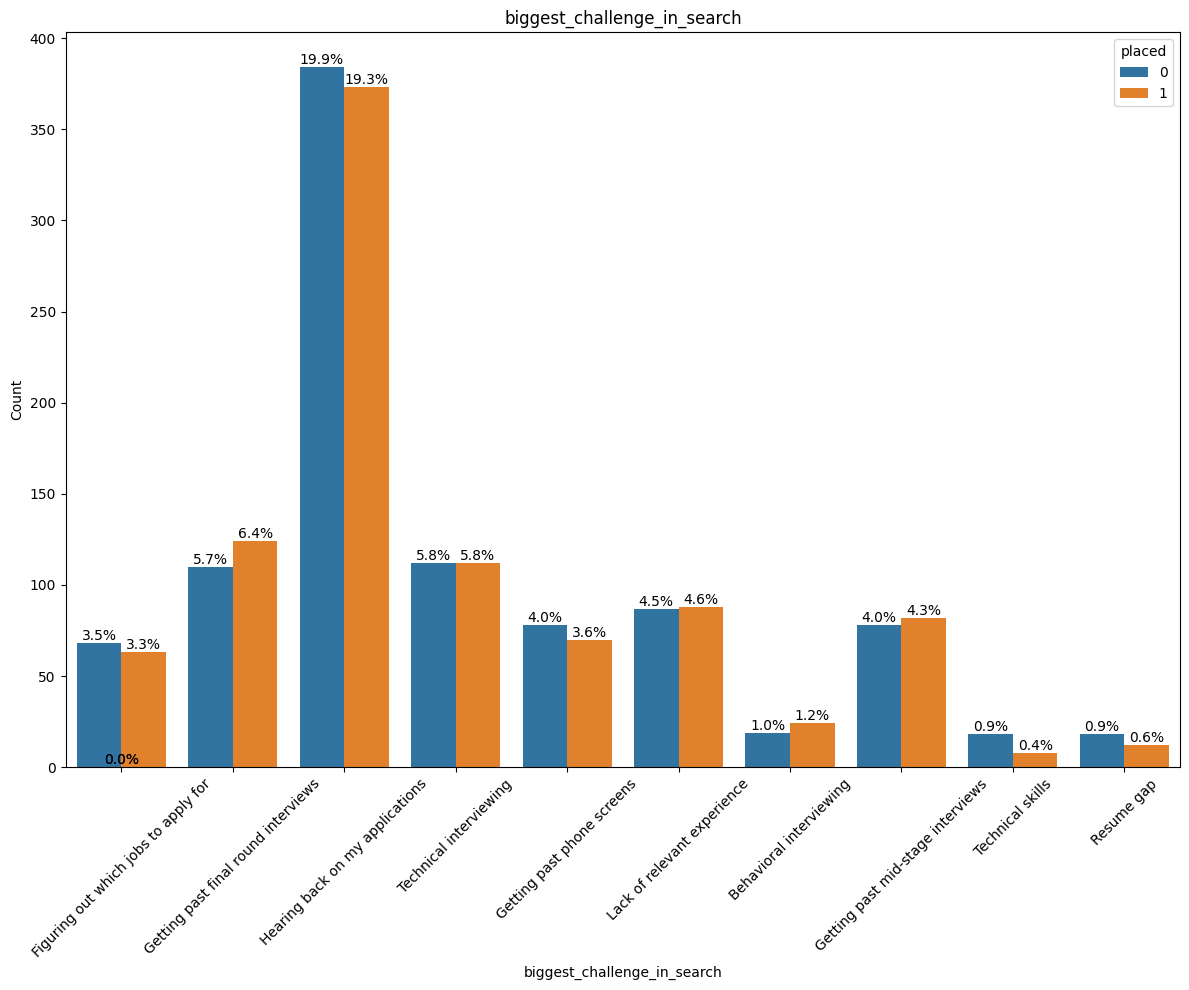

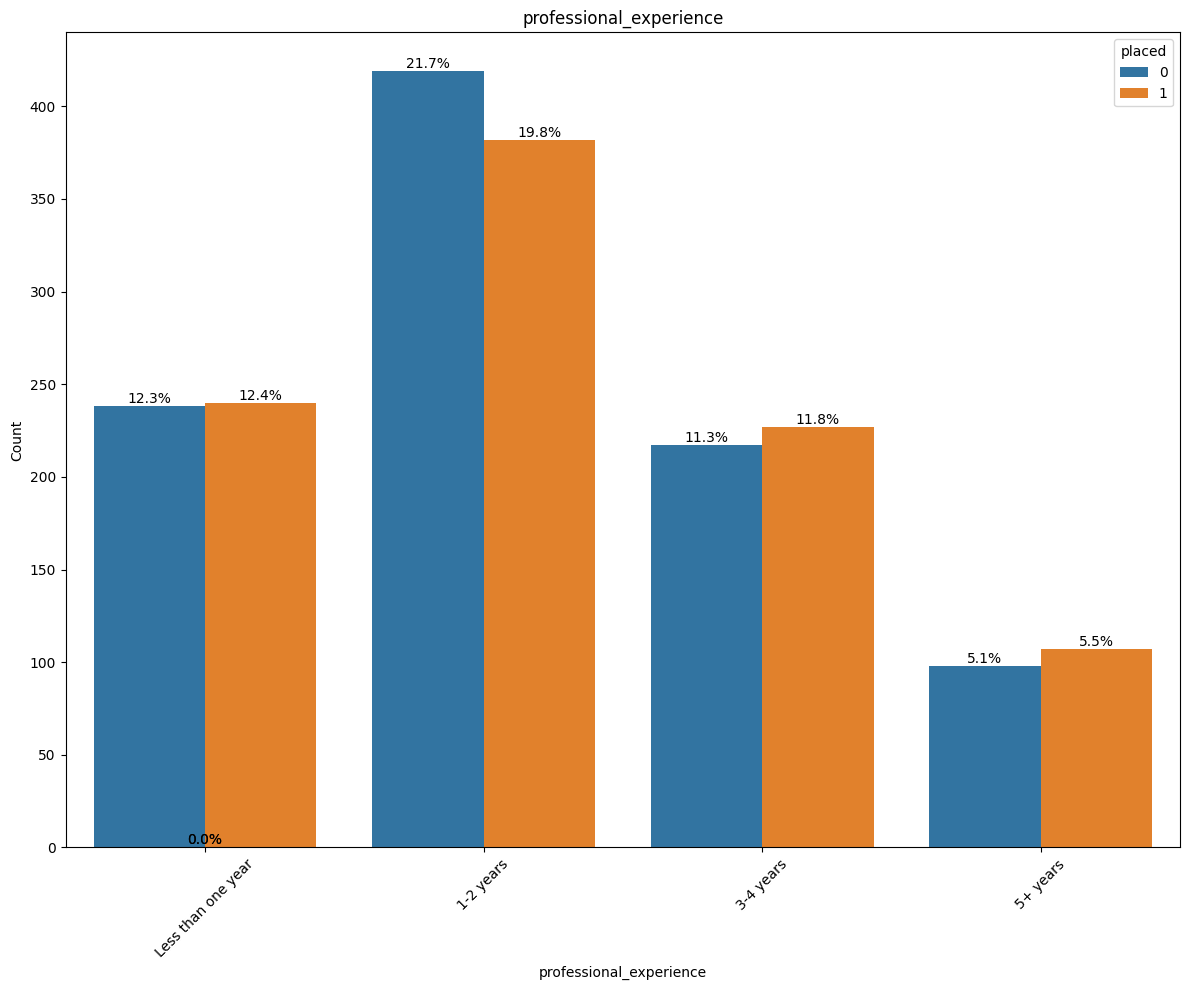

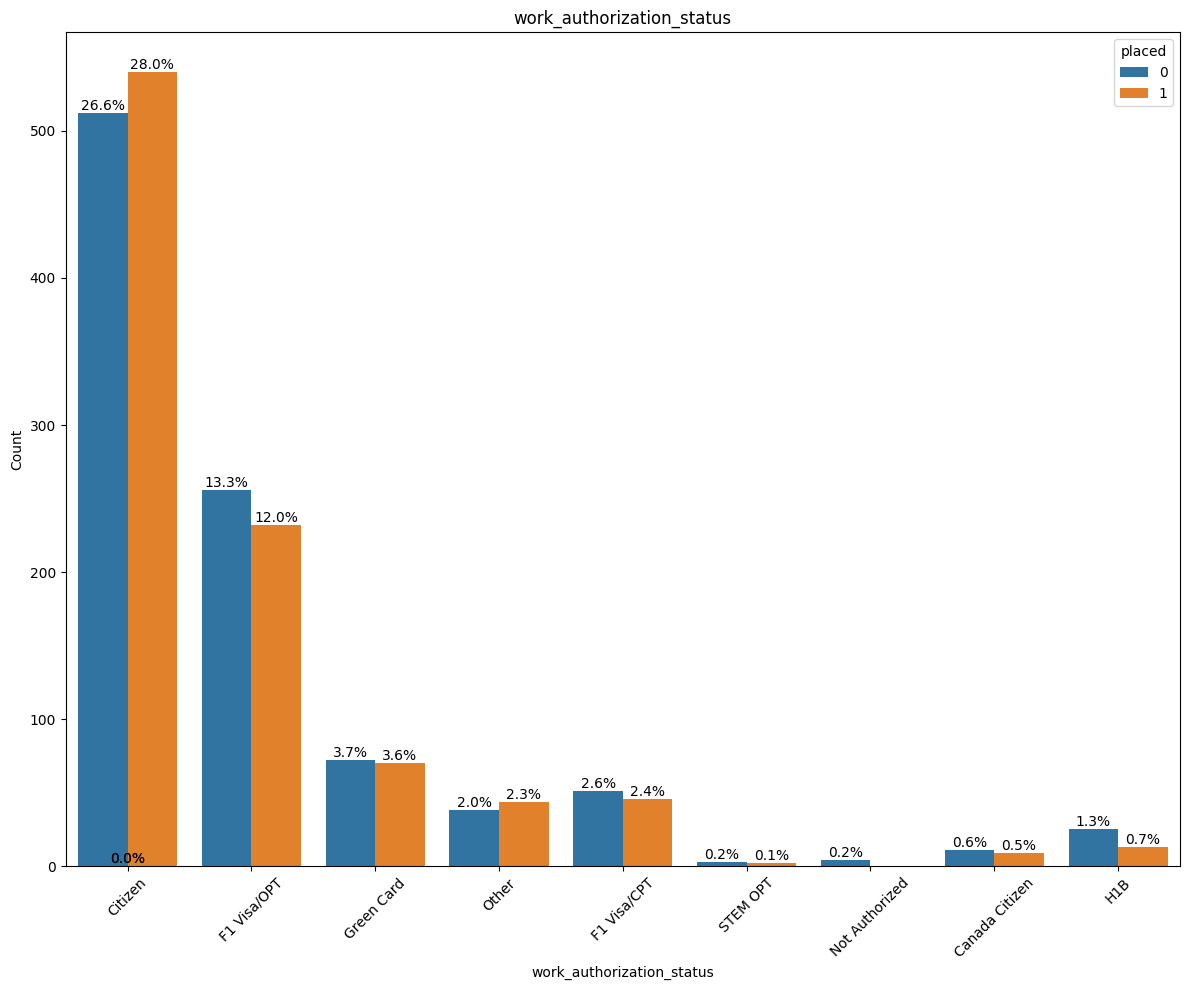

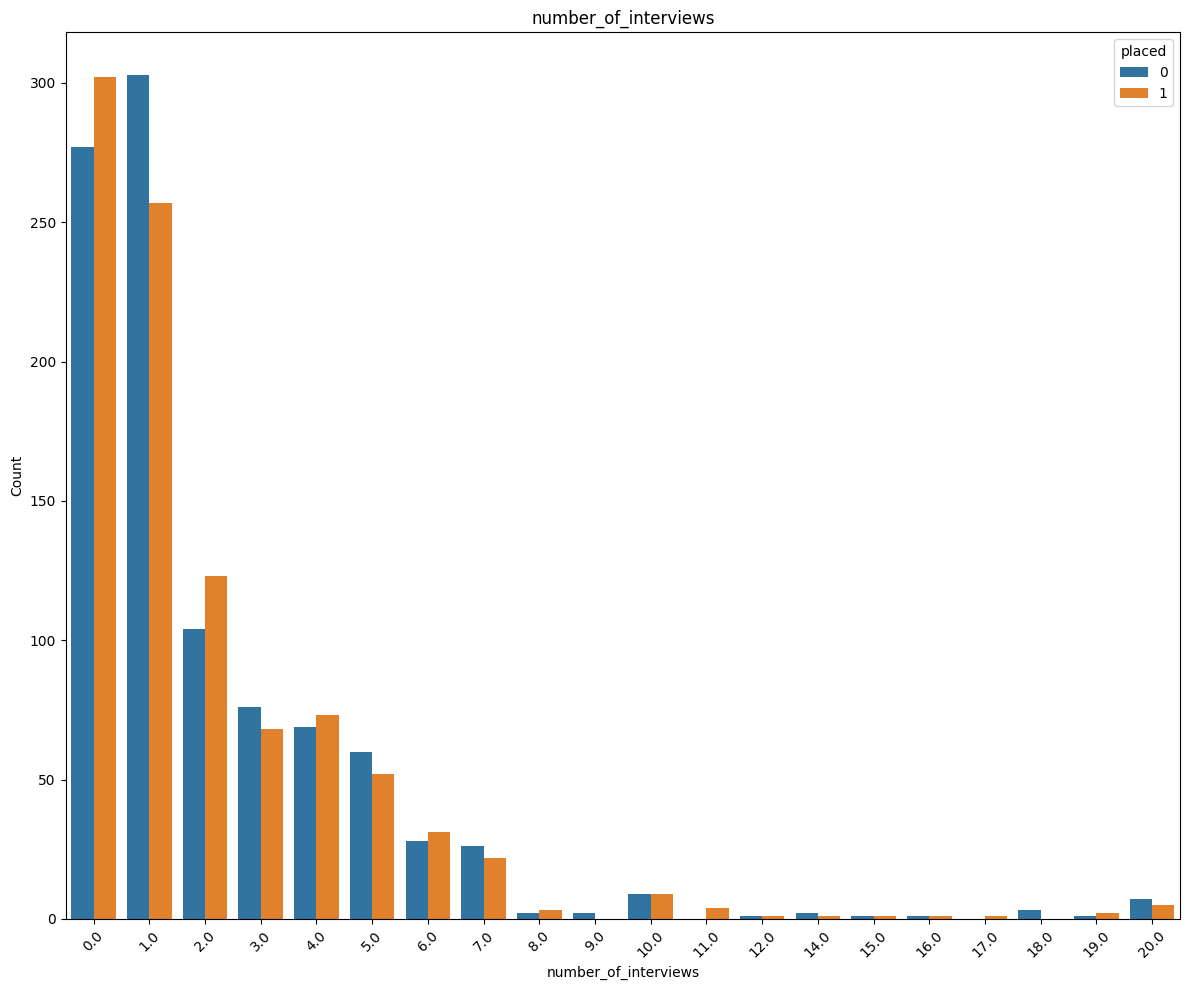

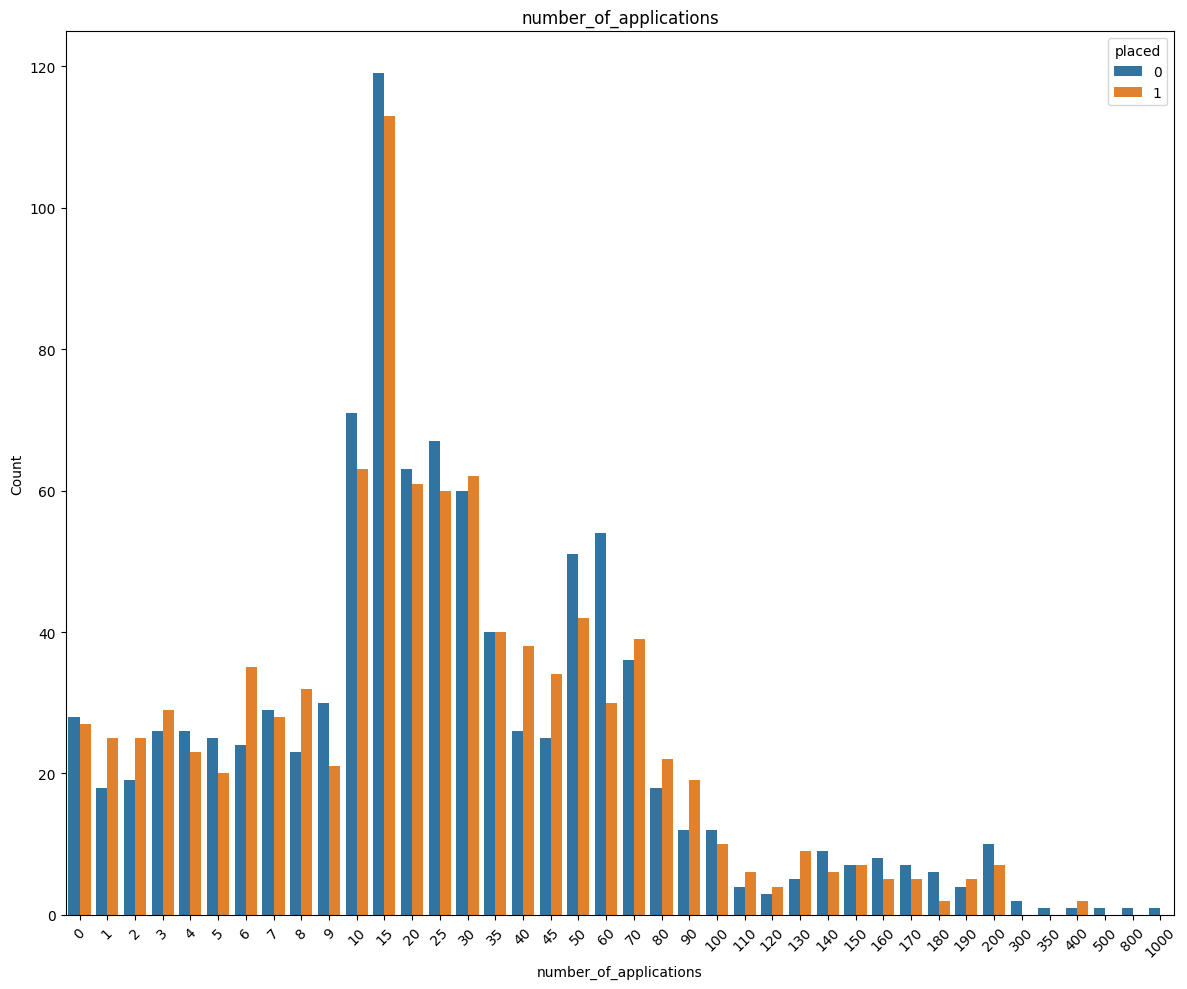

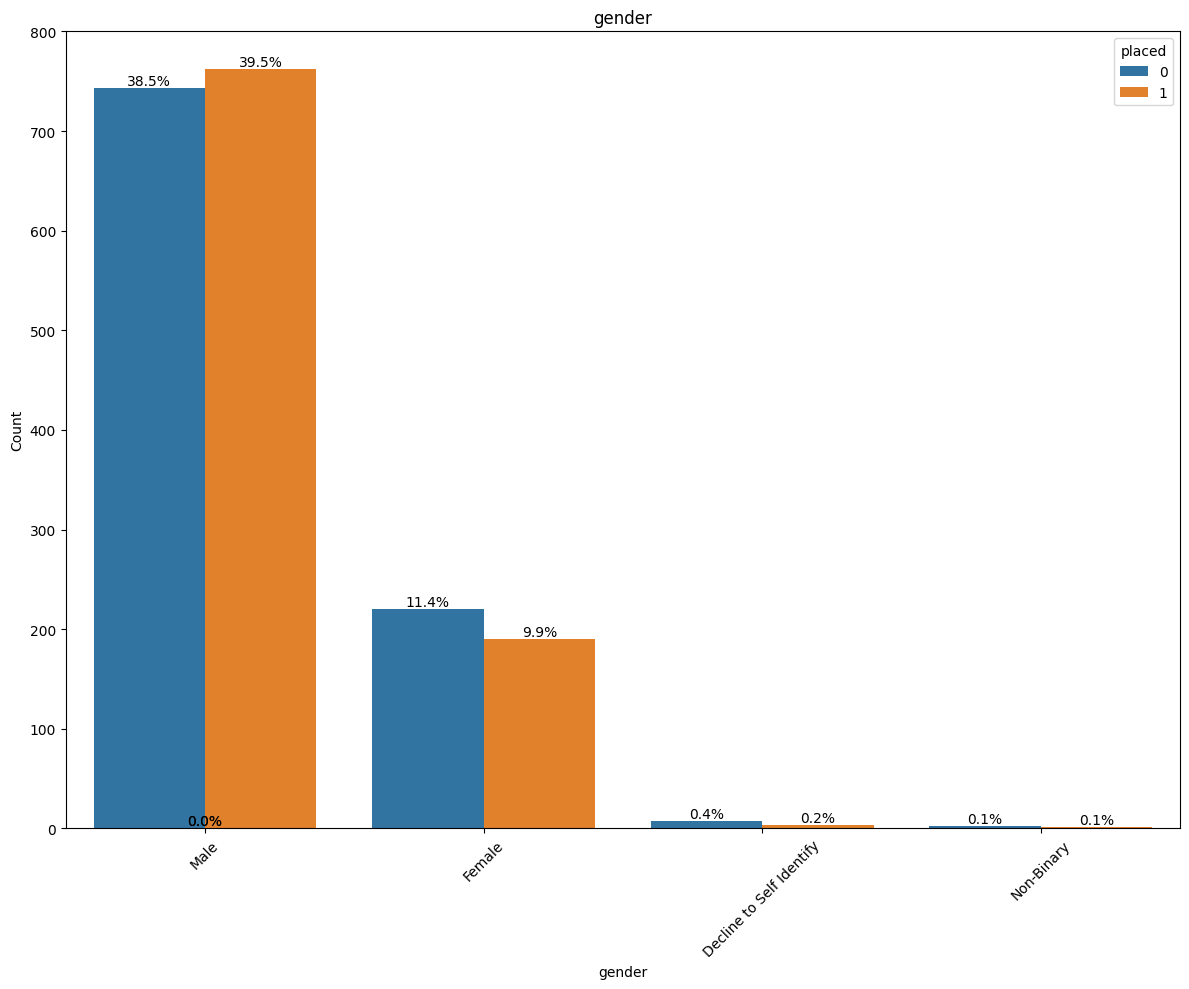

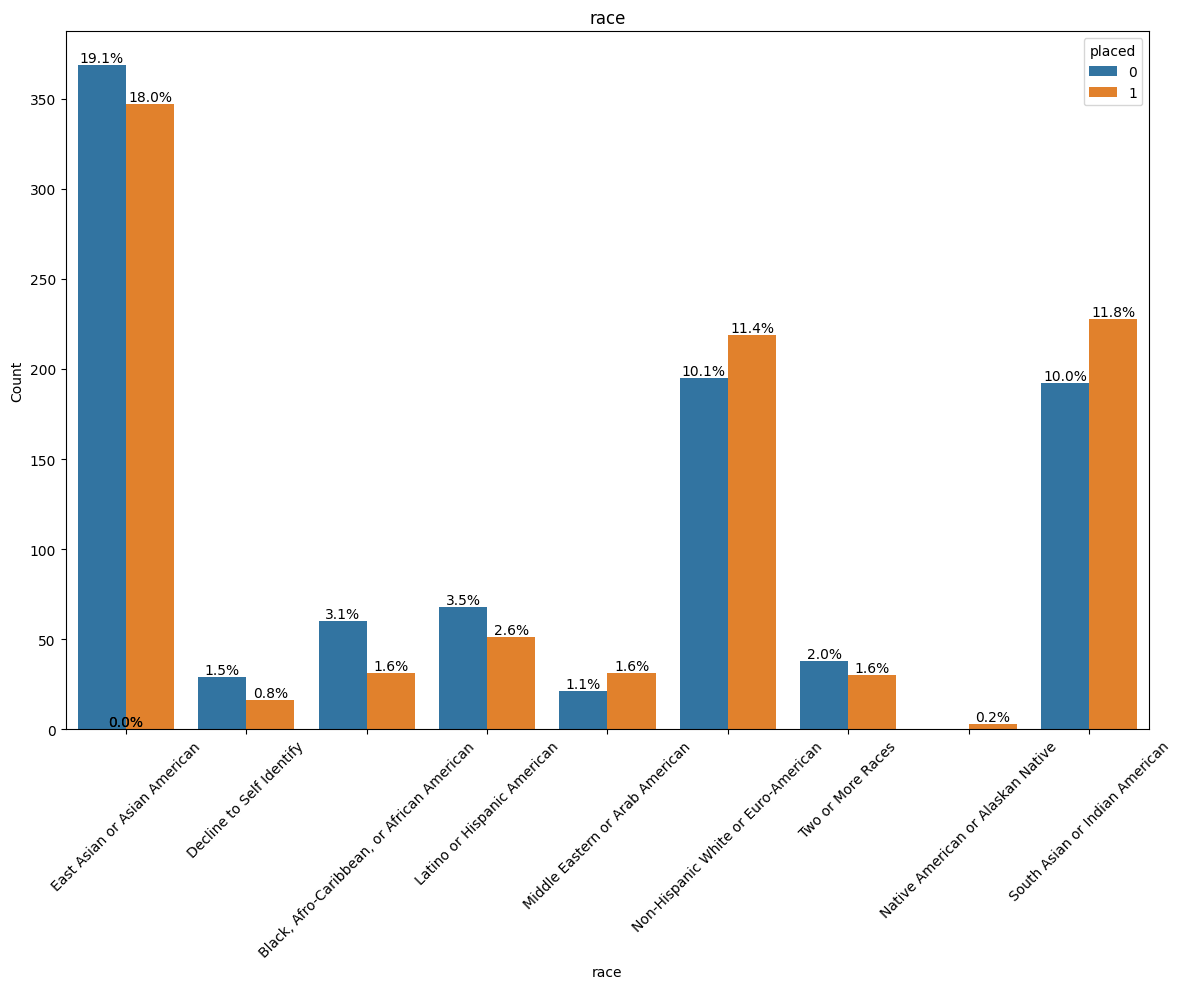

In [ ]:
columns_with_percentages = ['pathrise_status', 'primary_track','placed', 'employment_status ',
       'highest_level_of_education', 'length_of_job_search',
       'biggest_challenge_in_search', 'professional_experience',
       'work_authorization_status','gender', 'race']
df1 = df.drop(columns=['program_duration_days'])
for column in df1.columns:
    plt.figure(figsize=(12, 10))
    ax = sns.countplot(x=column, data=df, hue='placed')
    plt.title(f'{column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed

    if column in columns_with_percentages:
        total = len(df1[column])

        for p in ax.patches:
            percentage = f'{100 * p.get_height() / total:.1f}%'
            x = p.get_x() + p.get_width() / 2
            y = p.get_height()
            ax.annotate(percentage, (x, y), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

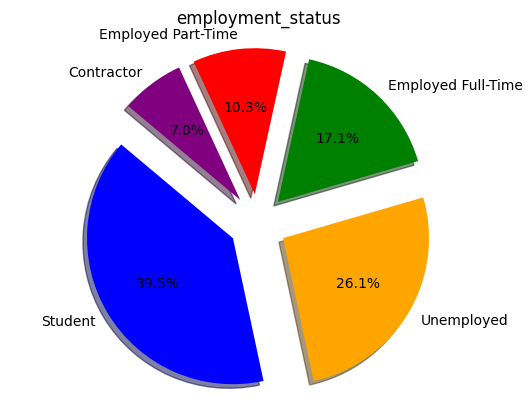

In [ ]:
category_counts = df['employment_status '].value_counts()

sizes = (category_counts / category_counts.sum()) * 100

labels = category_counts.index

colors = ['blue', 'orange', 'green', 'red', 'purple']
explode = [0.2] * len(labels)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('employment_status')

plt.axis('equal')
plt.show()


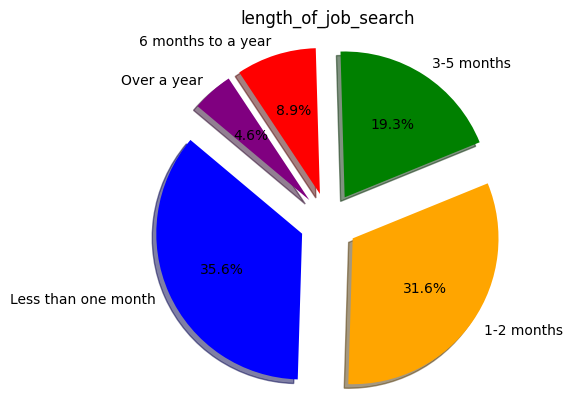

In [ ]:
category_counts = df['length_of_job_search'].value_counts()

sizes = (category_counts / category_counts.sum()) * 100

labels = category_counts.index

colors = ['blue', 'orange', 'green', 'red', 'purple']
explode = [0.2] * len(labels)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('length_of_job_search')

plt.axis('equal')
plt.show()

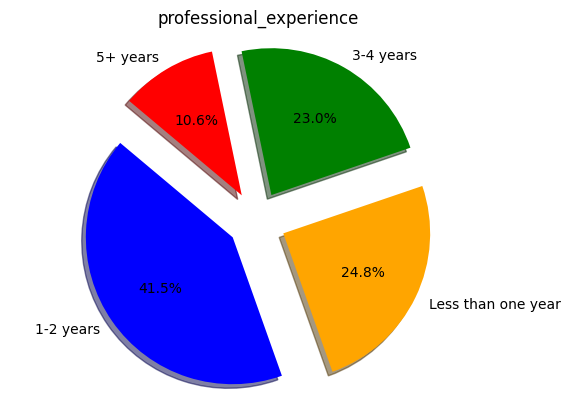

In [ ]:
category_counts = df['professional_experience'].value_counts()

sizes = (category_counts / category_counts.sum()) * 100

labels = category_counts.index

colors = ['blue', 'orange', 'green', 'red', 'purple']
explode = [0.2] * len(labels)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('professional_experience')
plt.axis('equal')
plt.show()

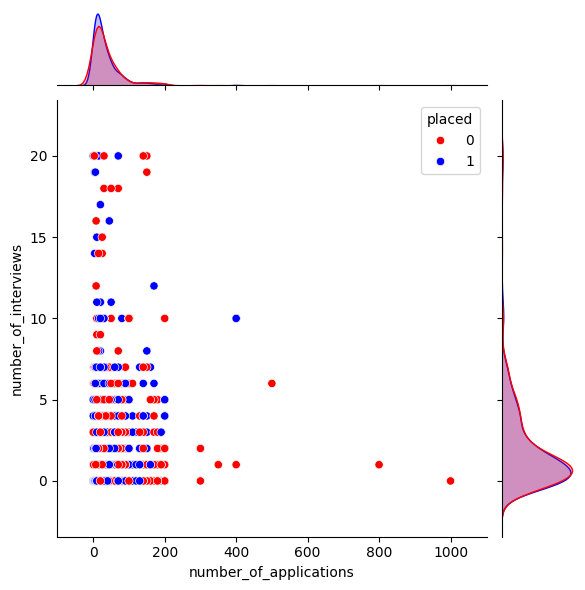

In [ ]:
 palette_colors = { 0: 'red', 1: 'blue'}
sns.jointplot(x='number_of_applications', y='number_of_interviews', hue='placed', data=df, kind='scatter', palette=palette_colors)
plt.show()

<font size='+2' color='GREEN' face='Palatino
'><b>Feature Engineering</b></font>

---



In [ ]:
Processed_df = pd.get_dummies(df, columns=['pathrise_status', 'primary_track', 'cohort_tag',
       'employment_status ',
       'highest_level_of_education', 'length_of_job_search',
       'biggest_challenge_in_search', 'professional_experience',
       'work_authorization_status','gender', 'race']).astype(int)

In [ ]:
a = Processed_df.drop(columns=['program_duration_days'])

In [ ]:
b = Processed_df['program_duration_days']

<font size='+2' color='GREEN' face='Palatino
'><b>Modeling</b></font>

---



In [ ]:
a_train,a_test,b_train,b_test = train_test_split(a,b,test_size=0.3, random_state=101)

<font size='+2' color='violet' face='Palatino
'><b>Linear Regressiom Model</b></font>

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(a_train,b_train)

LinearRegression()

In [ ]:
predict_lr = lr.predict(a_test)
predict_lr[:10]

array([160.74820814, 110.9269541 , -16.17479481, -31.29912351,
       186.19467422, 238.26072969, 162.96439414,  13.60694624,
       118.47544361, 167.55458869])

In [ ]:
residual = (predict_lr - b_test)

<Axes: xlabel='program_duration_days'>

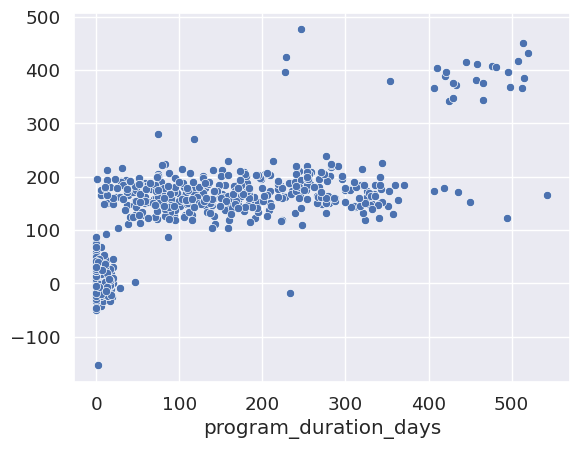

In [ ]:
sns.scatterplot(x=b_test, y=predict_lr)

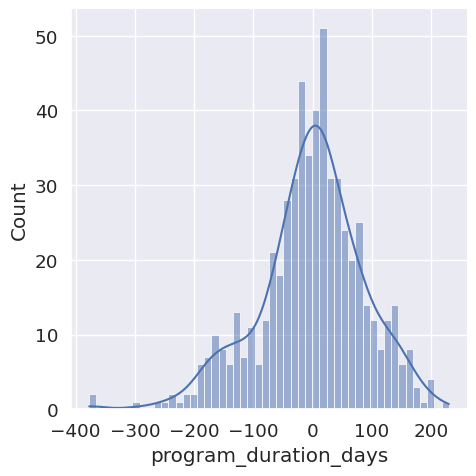

In [ ]:
sns.displot(residual,bins=50, kde=True)

In [ ]:
print('MAE:', metrics.mean_absolute_error(b_test, predict_lr))

MAE: 66.6807867644896


In [ ]:
pickle.dump(lr, open('Pro_Day_Estimator.pkl' , 'wb'))

 **Logistic Regression Model**

In [ ]:
x = Processed_df.drop(columns=['placed'])

In [ ]:
y = Processed_df['placed']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=101)

In [ ]:
logreg = LogisticRegression()

In [ ]:
logreg.fit(x_train,y_train)

LogisticRegression()

In [ ]:
predict_log = logreg.predict(x_test)


**Model Evaluation**

In [ ]:
confusion_matrix(predict_log,y_test)

array([[317,   0],
       [  0, 262]])

In [ ]:
print(classification_report(y_test, predict_log))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       317
           1       1.00      1.00      1.00       262

    accuracy                           1.00       579
   macro avg       1.00      1.00      1.00       579
weighted avg       1.00      1.00      1.00       579



In [ ]:
accuracy_score(y_test, predict_log)

1.0

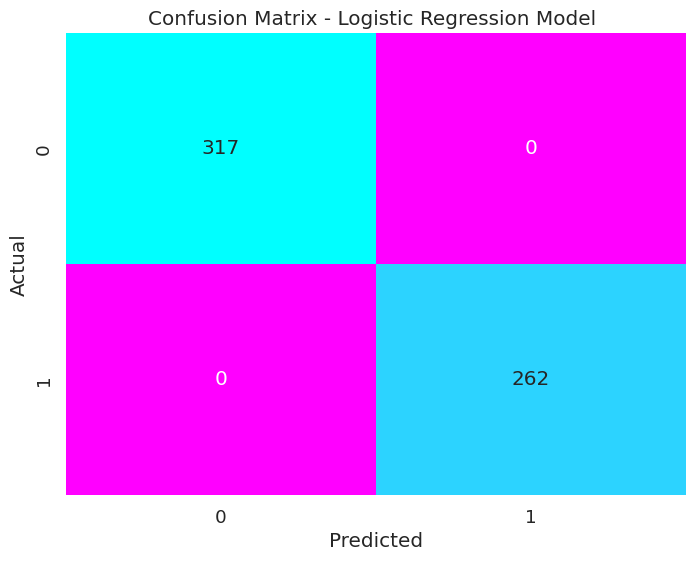

In [ ]:
conf_matrix = [[317, 0],
               [0, 262]]

labels = [0 , 1]
sns.set(font_scale=1.2)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='cool_r', xticklabels=labels, yticklabels=labels, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression Model ')
plt.show()


<font size='+2' color='violet' face='Palatino
'><b>K Neighbors Nearest Model</b></font>


In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
predict_knn = knn.predict(x_test)
predict_knn[:10]

array([1, 1, 0, 0, 1, 1, 1, 0, 1, 1])

**Model Evaluation**

In [ ]:
confusion_matrix(y_test, predict_knn)

array([[228,  89],
       [ 51, 211]])

In [ ]:
accuracy_score(y_test,predict_knn)

0.7582037996545768

In [ ]:
print(classification_report(y_test,predict_knn))

              precision    recall  f1-score   support

           0       0.82      0.72      0.77       317
           1       0.70      0.81      0.75       262

    accuracy                           0.76       579
   macro avg       0.76      0.76      0.76       579
weighted avg       0.77      0.76      0.76       579



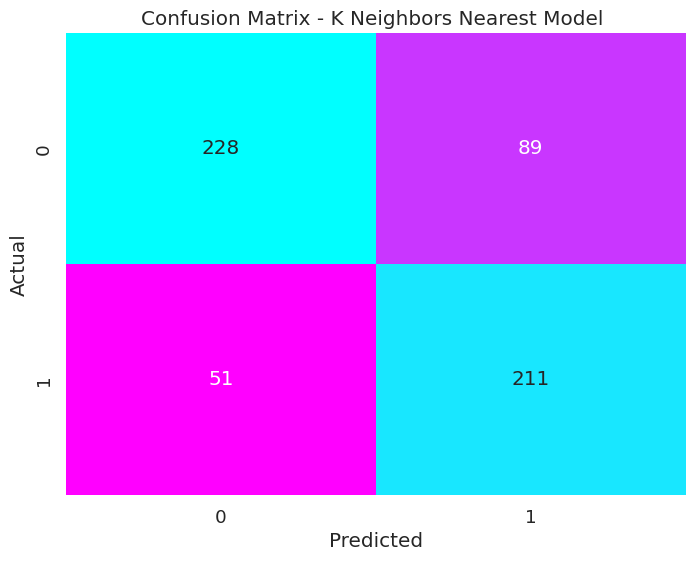

In [ ]:
conf_matrix = [[228, 89],
               [51, 211]]

labels = [0 , 1]
sns.set(font_scale=1.2)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='cool_r', xticklabels=labels, yticklabels=labels, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - K Neighbors Nearest Model ')
plt.show()


<font size='+2' color='violet' face='Palatino
'><b>Decision Tree Model</b></font>

In [ ]:
tree = DecisionTreeClassifier()

In [ ]:
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
predict_tree = tree.predict(x_test)
predict_tree [:10]

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 1])

**Model Evaluation**

In [ ]:
confusion_matrix(y_test,predict_tree)

array([[317,   0],
       [  0, 262]])

In [ ]:
accuracy_score(y_test,predict_tree)

1.0

In [ ]:
print(classification_report(y_test,predict_tree))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       317
           1       1.00      1.00      1.00       262

    accuracy                           1.00       579
   macro avg       1.00      1.00      1.00       579
weighted avg       1.00      1.00      1.00       579



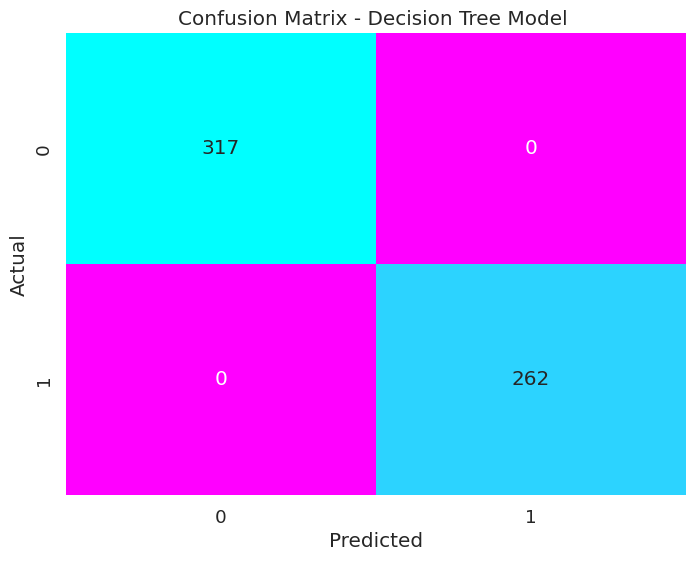

In [ ]:
conf_matrix = [[317, 0],
               [0, 262]]

labels = [0 , 1]
sns.set(font_scale=1.2)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='cool_r', xticklabels=labels, yticklabels=labels, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree Model ')
plt.show()

<font size='+2' color='violet' face='Palatino
'><b>Random Forest Model</b></font>

In [ ]:
forest = RandomForestClassifier(class_weight='balanced')

In [ ]:
forest.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced')

In [ ]:
predict_forest = forest.predict(x_test)
predict_forest[:10]

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 1])

**Model Evaluation**

In [ ]:
confusion_matrix(y_test,predict_forest)

array([[317,   0],
       [  0, 262]])

In [ ]:
accuracy_score(y_test,predict_forest)

1.0

In [ ]:
print(classification_report(y_test,predict_forest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       317
           1       1.00      1.00      1.00       262

    accuracy                           1.00       579
   macro avg       1.00      1.00      1.00       579
weighted avg       1.00      1.00      1.00       579



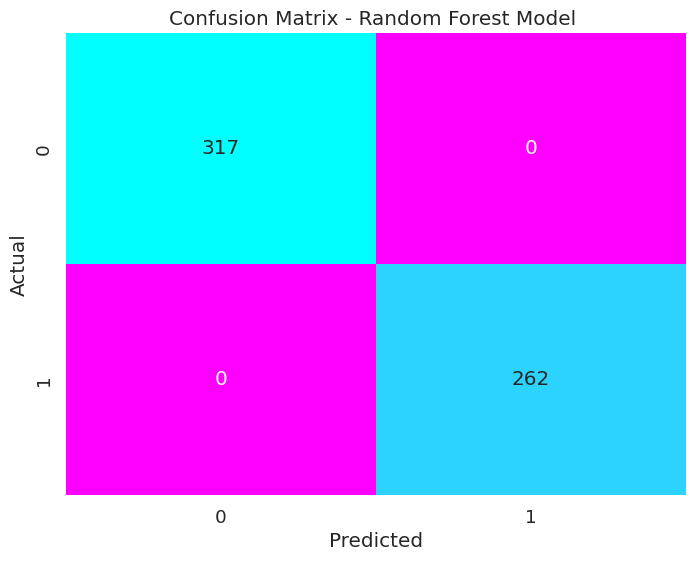

In [ ]:
conf_matrix = [[317, 0],
               [0, 262]]

labels = [0 , 1]
sns.set(font_scale=1.2)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='cool_r', xticklabels=labels, yticklabels=labels, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest Model ')
plt.show()

In [ ]:
pickle.dump(knn, open('placement_Estimator.pkl' , 'wb'))

<center><font size='+8' color='Blue' face='Courier New'><b>The End</b></font></center>


